In [1]:

!nvidia-smi

Thu Nov 20 10:16:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P3             13W /   50W |    1249MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

from IPython.display import FileLink
import os

In [9]:
path = input("Paste the full path to your heart.csv file here and press Enter:\n")
df = pd.read_csv(path.strip('"'))   # removes quotes if you copy-paste from Explorer/Finder
print("Loaded! Shape:", df.shape)
df.head(10)

Paste the full path to your heart.csv file here and press Enter:
 heart.csv


Loaded! Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
print("Shape: ", df.shape)

Shape:  (918, 12)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## 2. Define Target and Feature Types
We will explicitly define which columns are numeric and which are categorical. This helps keep the rest of the notebook clean and less error prone.

In [13]:
target_col = "HeartDisease"
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS",
                "MaxHR", "Oldpeak"]

categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]

print("Target:", target_col)
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Target: HeartDisease
Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


3. Missing Values and Basic Quality Checks

In [15]:
# Check missing values count per column
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
# Look at some basic value rangesab
df[numeric_cols].agg(["min", "max", "mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [18]:
for c in categorical_cols:
  print(c, df[c].unique())
#M, F, Female, Male, 'F'

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


4. Understanding Distributions with Histograms and Boxplots

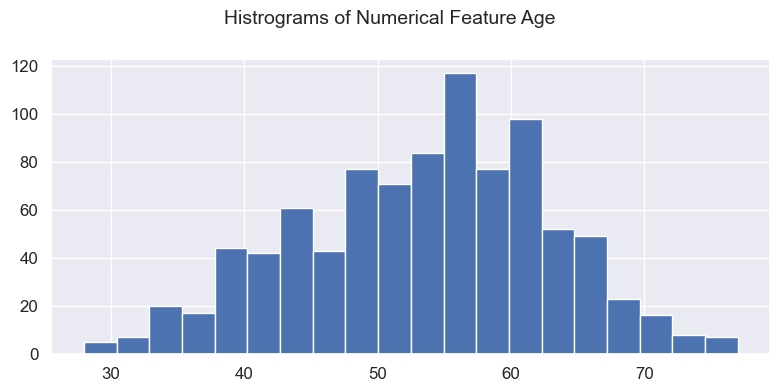

In [19]:
# Histograms for numeric features
df["Age"].hist(bins=20, figsize=(8,4))
plt.suptitle("Histrograms of Numerical Feature Age", fontsize = 14)
plt.tight_layout()
plt.show()

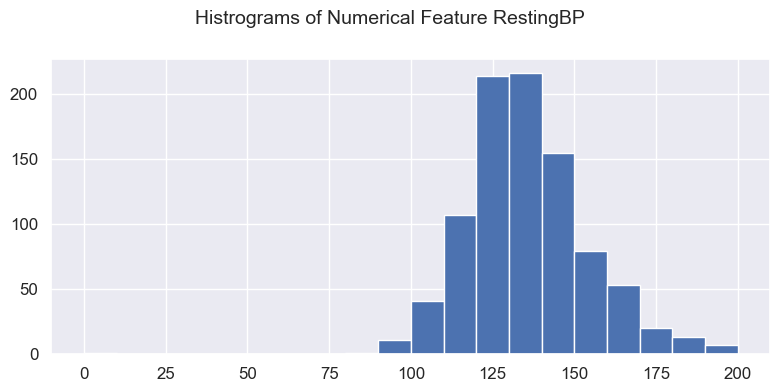

In [20]:
df["RestingBP"].hist(bins=20, figsize=(8,4))
plt.suptitle("Histrograms of Numerical Feature RestingBP", fontsize = 14)
plt.tight_layout()
plt.show()

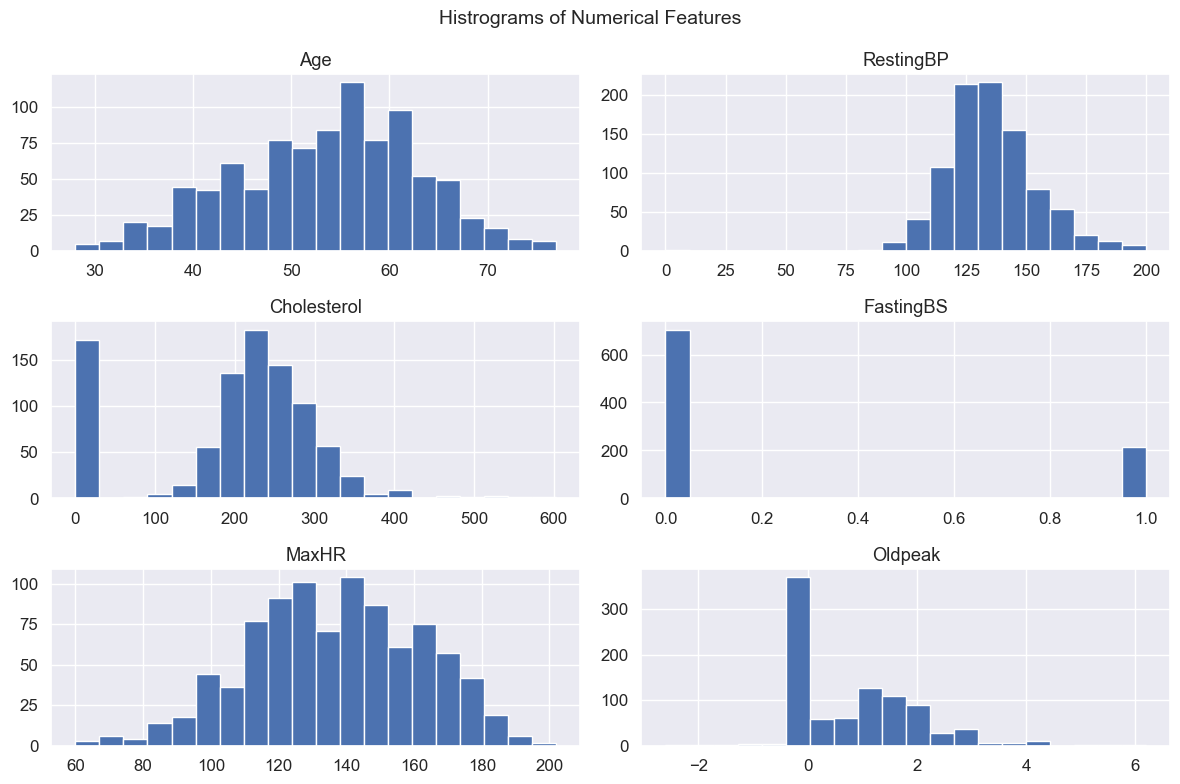

In [21]:
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histrograms of Numerical Features", fontsize = 14)
plt.tight_layout()
plt.show()

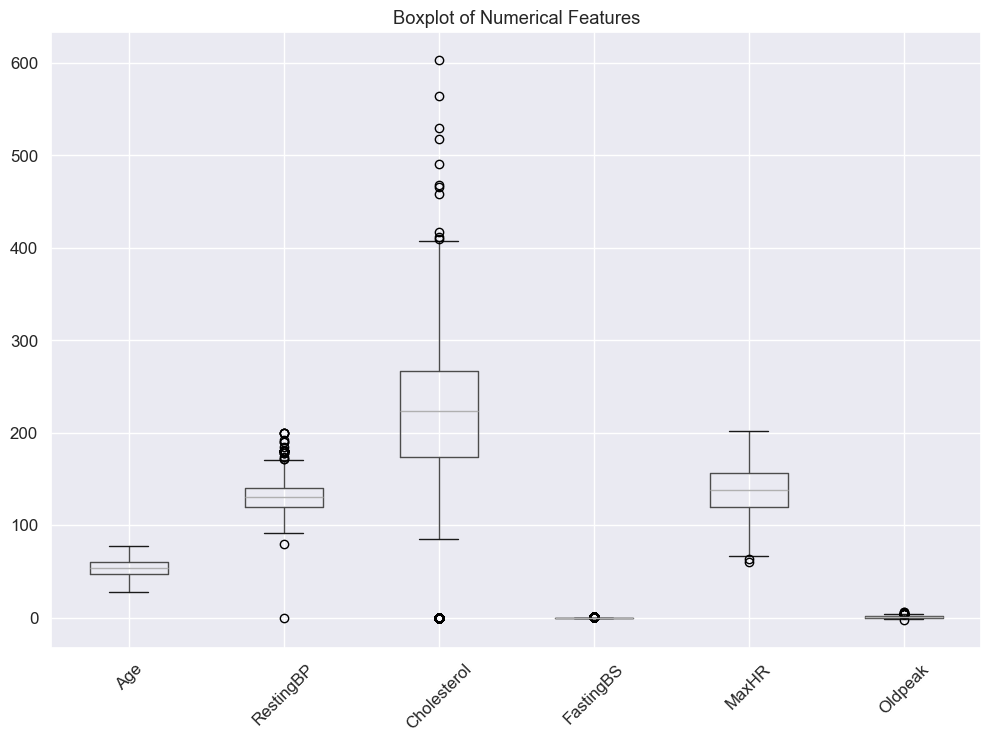

In [22]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

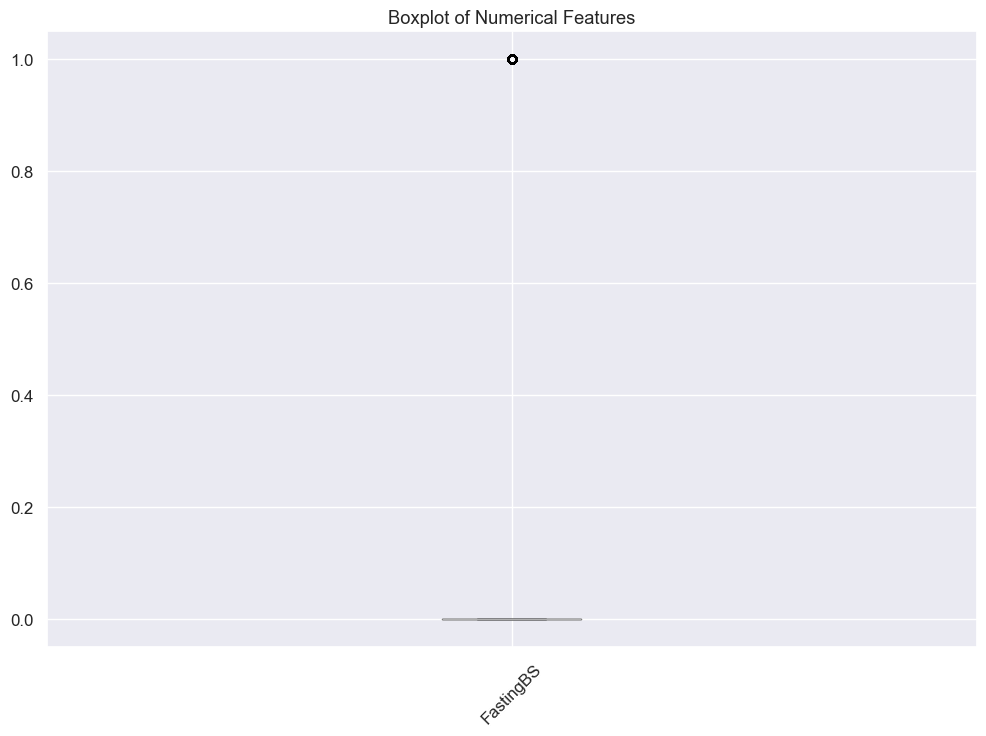

In [24]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df.boxplot(column=numeric_cols[3])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## 5. Target Distribution and Class Imbalance

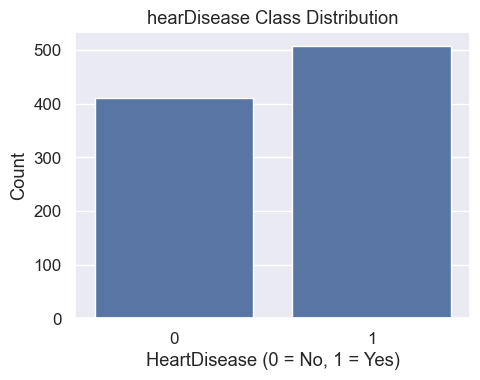

In [25]:
#Target Distribution and Class Imbalance
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("hearDisease Class Distribution")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 6. Categorical Feature Exploration

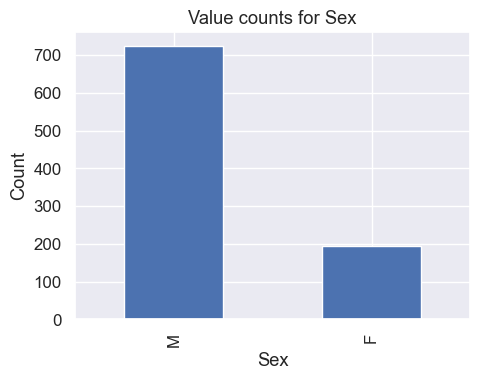

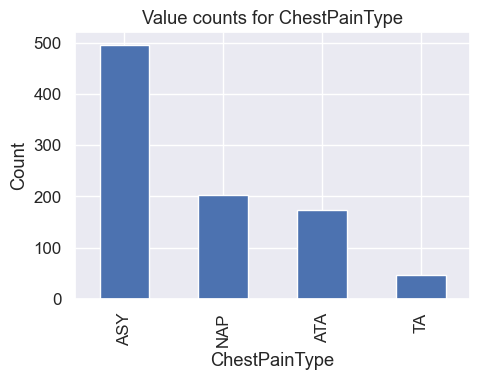

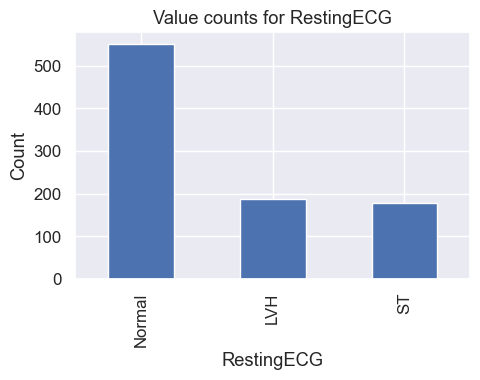

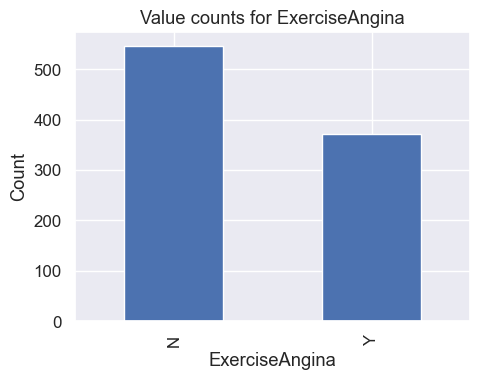

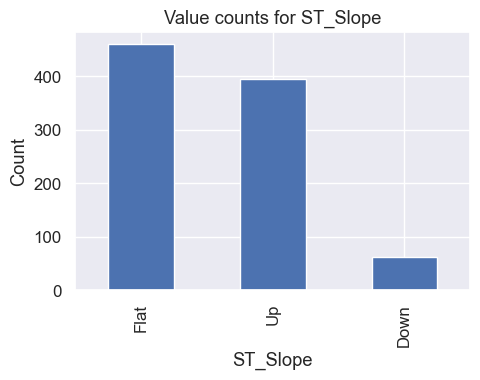

In [27]:
#Categorical Feature Exploration
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

## 7. Relationships Between Features and Target

We will first visualize numeric features against the target and then look at correlations.

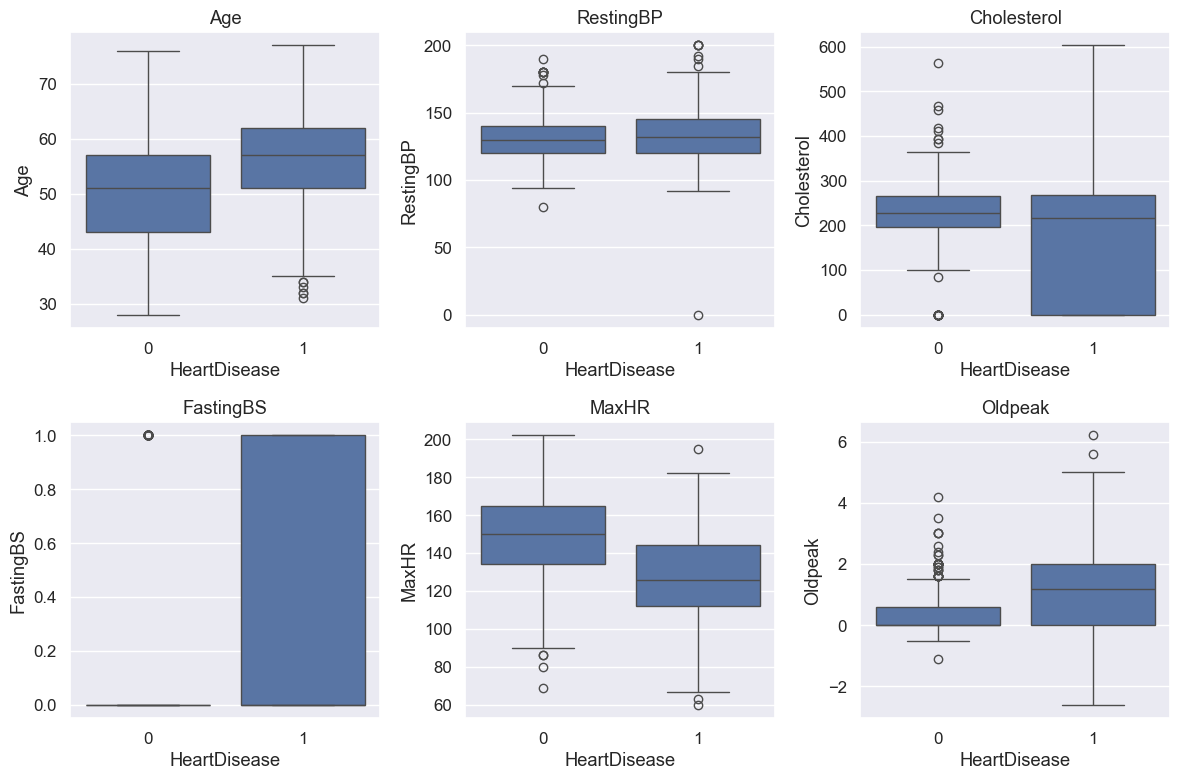

In [28]:
# Boxplots of numeric features split by HeartDisease
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y = df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

### 7.1 Pairplot for a Subset of Features

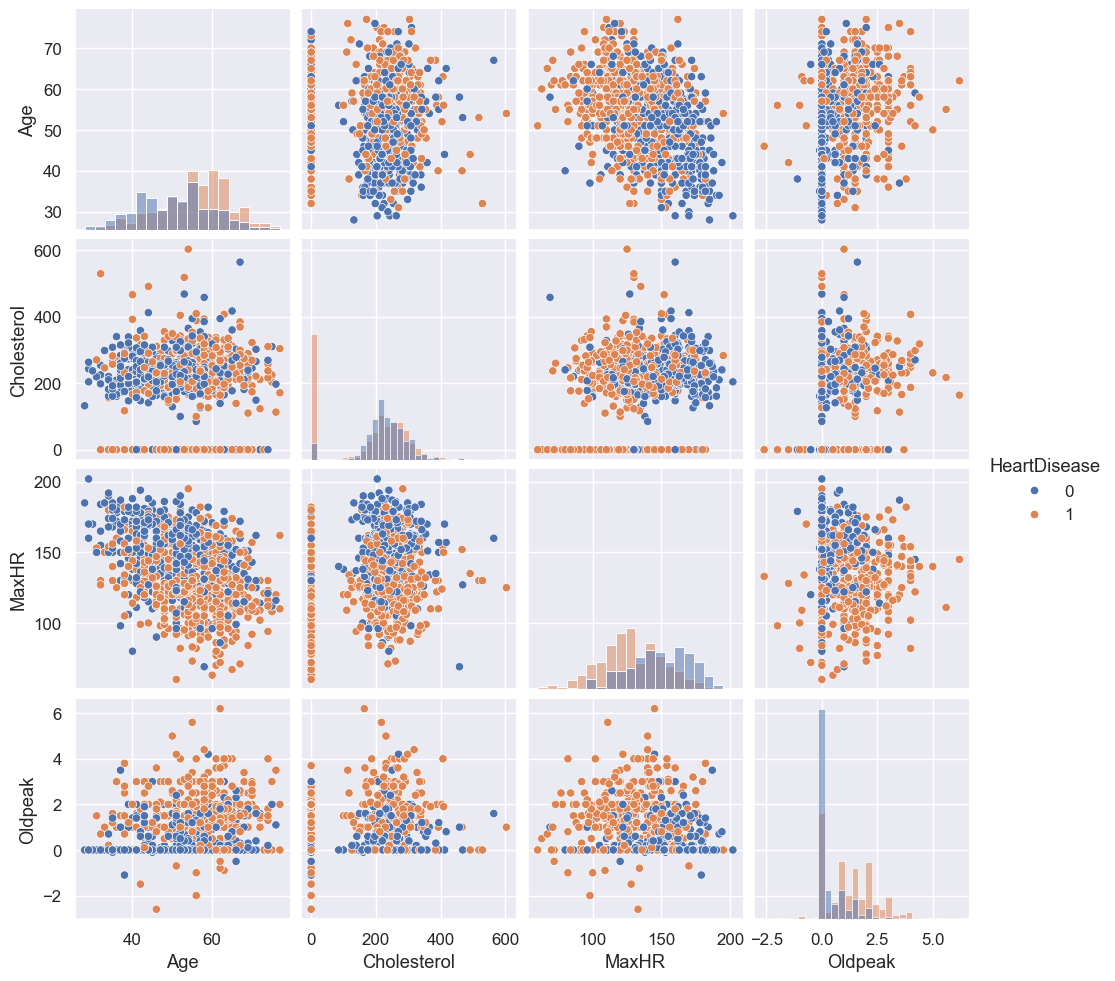

In [29]:
#Pairplot for a Subset of Features
sns.pairplot(df[["Age","Cholesterol","MaxHR", "Oldpeak", "HeartDisease"]],hue="HeartDisease", diag_kind="hist")
plt.show()

### 7.2 Correlation Matrix and Heatmap### 7.2 Correlation Matrix and Heatmap

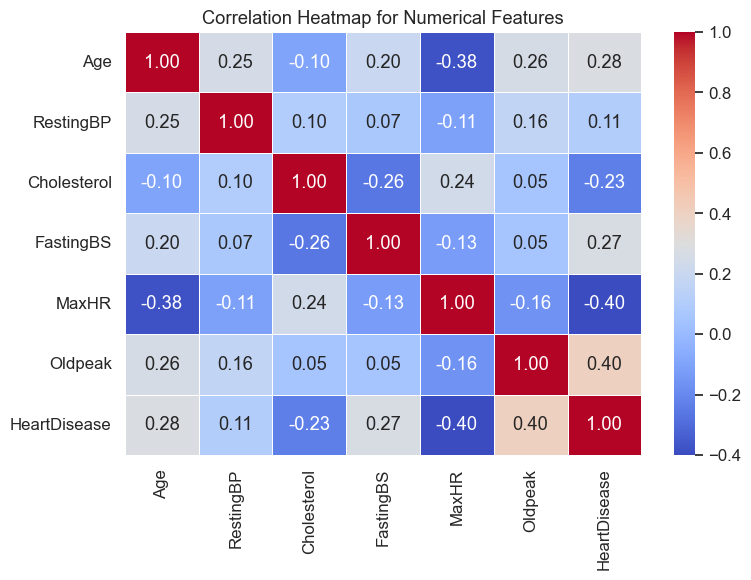

In [30]:
#Correlation Matrix and Heatmap
corr_matrix = df[numeric_cols + [target_col]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

In [31]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


Proportion of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


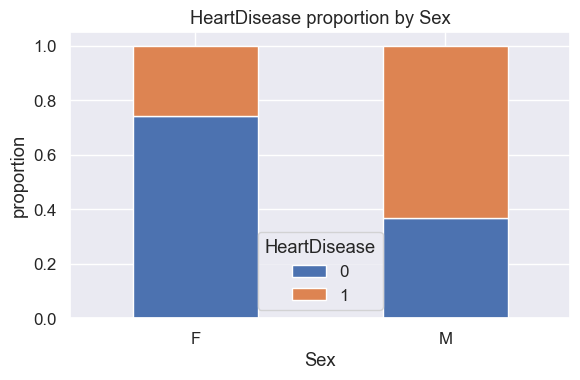


Proportion of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


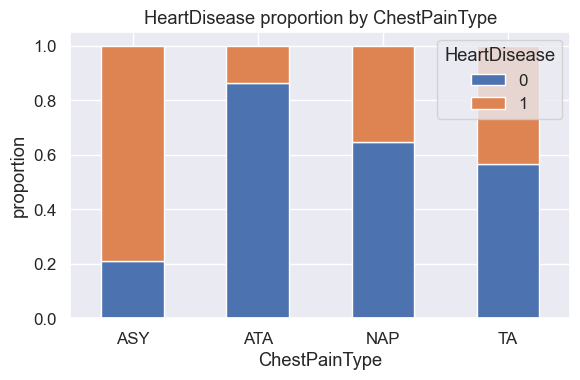


Proportion of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


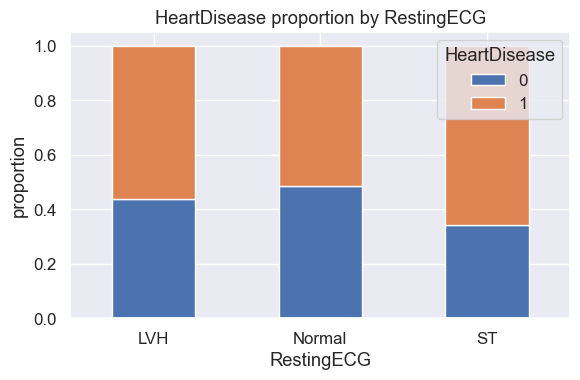


Proportion of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


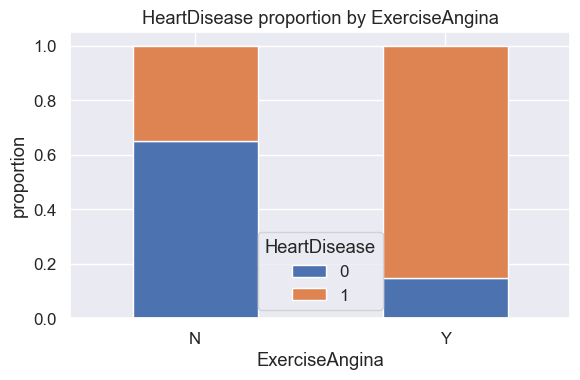


Proportion of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


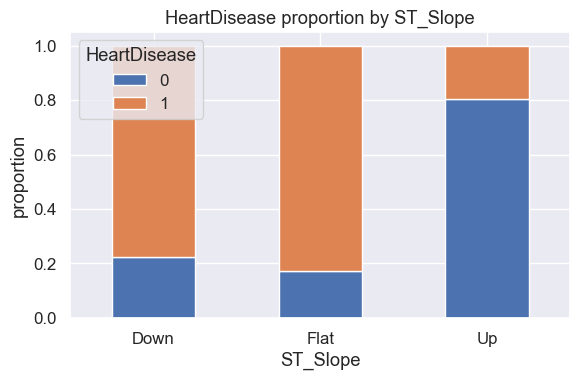

In [32]:
#Categorical Features vs Target
for c in categorical_cols:
  ct = pd.crosstab(df[c], df[target_col], normalize="index")
  print(f"\nProportion of HeartDisease within {c}")
  display(ct)

  ct.plot(kind="bar", stacked=True, figsize=(6,4))
  plt.title(f"HeartDisease proportion by {c}")
  plt.ylabel("proportion")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

In [33]:
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-Test Split (80-20), Stratified (কারণ টার্গেট ইমব্যালেন্সড)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Target distribution in Train:", y_train.value_counts(normalize=True))
print("Target distribution in Test:", y_test.value_counts(normalize=True))

Training set shape: (734, 11)
Testing set shape: (184, 11)
Target distribution in Train: HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64
Target distribution in Test: HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [35]:
# ======================
# 2. প্রি-প্রসেসিং পাইপলাইন
# ======================

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# নিউমেরিক এবং ক্যাটেগরিক্যাল কলাম
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Numeric Features Pipeline: ইমপুট করা থাকতে পারে মিসিং ভ্যালুর জন্য SimpleImputer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # যদি মিসিং থাকে
    ('scaler', StandardScaler())
])

# Categorical Features Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # যদি মিসিং থাকে
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# কলাম ট্রান্সফর্মার দিয়ে একত্রিত করা
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [37]:
# ======================
# 3. মডেল: Logistic Regression
# ======================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# পুরো পাইপলাইন
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# মডেল ট্রেন করা
model_lr.fit(X_train, y_train)

# প্রেডিকশন
y_pred_lr = model_lr.predict(X_test)

# ইভালুয়েশন
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.8858695652173914
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Confusion Matrix:
[[68 14]
 [ 7 95]]


In [42]:
!pip install xgboost lightgbm --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# ======================
# অতিরিক্ত মডেল ইমপোর্ট
# ======================

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'xgboost'